## Libraries for Time-Series Analysis

In [1]:
import pandas_datareader as pdr
import pandas as pd
from datetime import datetime

## Tesla Stock for TSA

In [2]:
df_tesla = pdr.get_data_yahoo('TSLA')
df_tesla

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2017-12-04,20.551332,20.040667,20.433332,20.346666,87526500.0,20.346666
2017-12-05,20.533333,20.066668,20.133333,20.246668,69697500.0,20.246668
2017-12-06,20.892668,20.000000,20.006666,20.884001,107929500.0,20.884001
2017-12-07,21.242001,20.736668,20.799999,20.749332,71709000.0,20.749332
2017-12-08,21.132000,20.750668,20.973333,21.008667,52027500.0,21.008667
...,...,...,...,...,...,...
2022-11-28,188.500000,179.000000,179.960007,182.919998,92905200.0,182.919998
2022-11-29,186.380005,178.750000,184.990005,180.830002,83357100.0,180.830002
2022-11-30,194.759995,180.630005,182.429993,194.699997,109186400.0,194.699997


## SMA: Simple Moving Average

<AxesSubplot:xlabel='Date'>

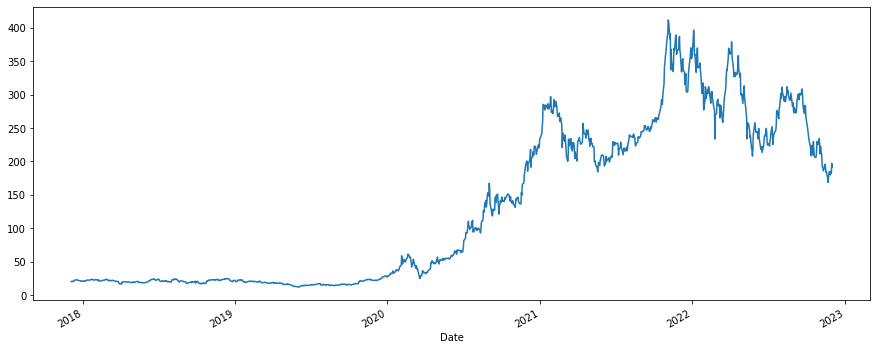

In [3]:
df_tesla['Open'].plot(figsize=(15,6))

### SMA: Rolling averages for 10, 30 & 50 days

<AxesSubplot:xlabel='Date'>

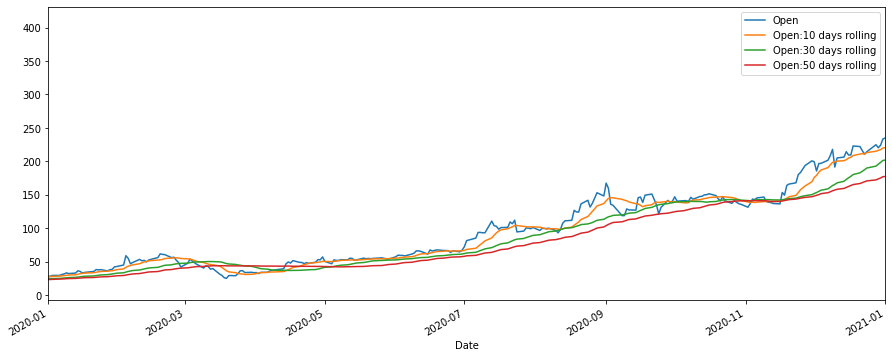

In [4]:
df_tesla['Open:10 days rolling'] = df_tesla['Open'].rolling(window=10,min_periods=1).mean()
df_tesla['Open:30 days rolling'] = df_tesla['Open'].rolling(window=30,min_periods=1).mean()
df_tesla['Open:50 days rolling'] = df_tesla['Open'].rolling(window=50,min_periods=1).mean()
df_tesla[['Open', 'Open:10 days rolling', 'Open:30 days rolling', 'Open:50 days rolling']].plot(xlim=['2020-01-01','2021-01-01'], figsize=(15,6))

## CMA(Expanding): Cumulative Moving Average

<AxesSubplot:xlabel='Date'>

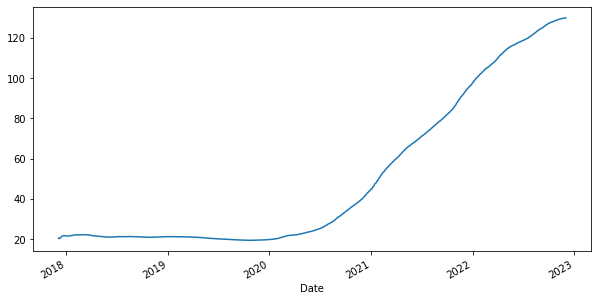

In [5]:
df_tesla['Open'].expanding().mean().plot(figsize=(10,5))

## EWMA: Exponential Weighted Moving Average

In [6]:
df_tesla['EMA_0.1'] = df_tesla['Open'].ewm(alpha=0.1, adjust=False).mean()

<AxesSubplot:xlabel='Date'>

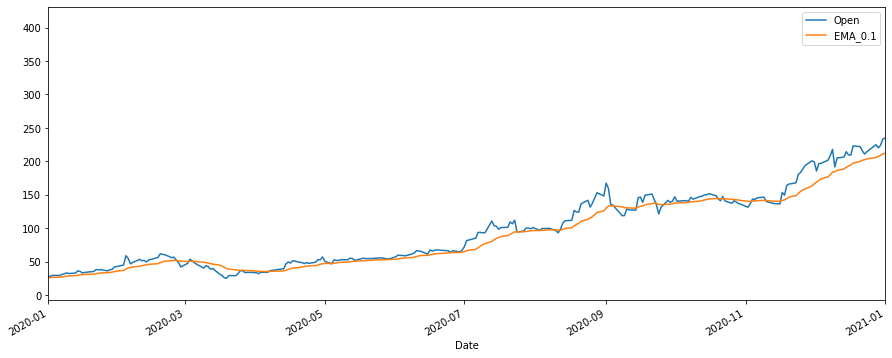

In [7]:
df_tesla[['Open', 'EMA_0.1']].plot(xlim=['2020-01-01','2021-01-01'], figsize=(15,6))

<AxesSubplot:xlabel='Date'>

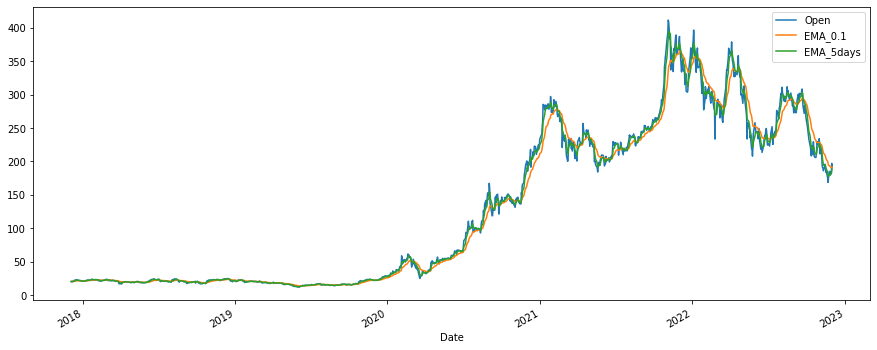

In [8]:
df_tesla['EMA_5days'] = df_tesla['Open'].ewm(span=5).mean()
df_tesla[['Open', 'EMA_0.1', 'EMA_5days']].plot(figsize=(15,6))

## ARIMA: AutoRegression Integrated Moving Average
p, d, q values are signficant
* Check the data for stationary by Dickey Fuller Test   
H0 -> Unit root=1 -> Data is not stationary   
H1 -> Unit root<1 -> Data is stationary

In [9]:
import statsmodels.api as sms
import matplotlib.pyplot as plt
%matplotlib inline

## Passengers data for ARIMA & SARIMAX

In [10]:
df_airline = pd.read_csv('airline_passengers.csv')
df_airline

,Month,Thousands of Passengers
0,1949-01,112.0
1,1949-02,118.0
2,1949-03,132.0
3,1949-04,129.0
4,1949-05,121.0
...,...,...
141,1960-10,461.0
142,1960-11,390.0
143,1960-12,432.0
144,NaN,NaN


### Dropping NA values

In [11]:
df_airline.dropna(axis=0, inplace=True)
df_airline

,Month,Thousands of Passengers
0,1949-01,112.0
1,1949-02,118.0
2,1949-03,132.0
3,1949-04,129.0
4,1949-05,121.0
...,...,...
139,1960-08,606.0
140,1960-09,508.0
141,1960-10,461.0
142,1960-11,390.0


### Column Data info

In [12]:
df_airline.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Month                    144 non-null    object 
 1   Thousands of Passengers  144 non-null    float64
dtypes: float64(1), object(1)
memory usage: 3.4+ KB


### Converting Month column: `object` to `datetime`

In [13]:
df_airline['Month']=pd.to_datetime(df_airline['Month'])
df_airline.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Month                    144 non-null    datetime64[ns]
 1   Thousands of Passengers  144 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 3.4 KB


### Month Column check 

In [14]:
df_airline

,Month,Thousands of Passengers
0,1949-01-01,112.0
1,1949-02-01,118.0
2,1949-03-01,132.0
3,1949-04-01,129.0
4,1949-05-01,121.0
...,...,...
139,1960-08-01,606.0
140,1960-09-01,508.0
141,1960-10-01,461.0
142,1960-11-01,390.0


### Setting Month column to index

In [15]:
df_airline.set_index('Month', inplace=True)
df_airline

,Thousands of Passengers
Month,
1949-01-01,112.0
1949-02-01,118.0
1949-03-01,132.0
1949-04-01,129.0
1949-05-01,121.0
...,...
1960-08-01,606.0
1960-09-01,508.0
1960-10-01,461.0


## Trend check of Data

<AxesSubplot:xlabel='Month'>

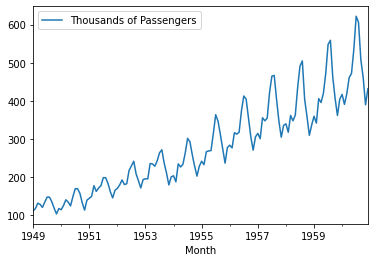

In [16]:
df_airline.plot()

## Utilizing ADFuller for hypothesis testing

In [17]:
from statsmodels.tsa.stattools import adfuller

In [18]:
def adf_test(series):
    result = adfuller(series)
    print(f'ADF Statistics: {result[0]}')
    print(f'p-value: {result[1]}')
    if result[1] <= 0.05:
        print('Strong evidence against the null hypothesis, reject the null hypothesis, data has no unit root and is stationary')
    else:
        print('Weak evidence against the null hypothesis, time series has a unit root, indicating it is non-stationary')

In [19]:
adf_test(df_airline['Thousands of Passengers'])

ADF Statistics: 0.8153688792060518
p-value: 0.991880243437641
Weak evidence against the null hypothesis, time series has a unit root, indicating it is non-stationary


## Differencing Technique

### 1 shift differencing

In [20]:
df_airline['Passengers First Difference'] = df_airline['Thousands of Passengers'] - df_airline['Thousands of Passengers'].shift(1)
df_airline

,Thousands of Passengers,Passengers First Difference
Month,,
1949-01-01,112.0,NaN
1949-02-01,118.0,6.0
1949-03-01,132.0,14.0
1949-04-01,129.0,-3.0
1949-05-01,121.0,-8.0
...,...,...
1960-08-01,606.0,-16.0
1960-09-01,508.0,-98.0
1960-10-01,461.0,-47.0


In [21]:
adf_test(df_airline['Passengers First Difference'].dropna())

ADF Statistics: -2.8292668241700074
p-value: 0.05421329028382446
Weak evidence against the null hypothesis, time series has a unit root, indicating it is non-stationary


### 2 shift differencing

In [22]:
df_airline['Passengers Second Difference'] = df_airline['Passengers First Difference'] - df_airline['Passengers First Difference'].shift(1)

In [23]:
adf_test(df_airline['Passengers Second Difference'].dropna())

ADF Statistics: -16.384231542468545
p-value: 2.732891850013967e-29
Strong evidence against the null hypothesis, reject the null hypothesis, data has no unit root and is stationary


### 12 shift differencing

In [24]:
df_airline['Passengers 12 Difference'] = df_airline['Thousands of Passengers'] - df_airline['Thousands of Passengers'].shift(12)

In [25]:
adf_test(df_airline['Passengers 12 Difference'].dropna())

ADF Statistics: -3.3830207264924796
p-value: 0.011551493085515008
Strong evidence against the null hypothesis, reject the null hypothesis, data has no unit root and is stationary


## ACF: AutoCorrelation Function & PACF: Partial AutoCorrelation Function

### ACF = Moving Average(MA)

In [26]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

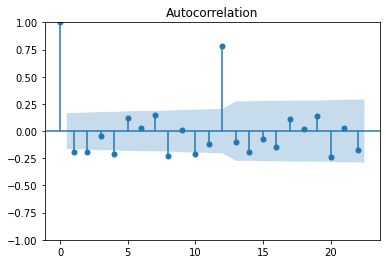

In [27]:
acf = plot_acf(df_airline['Passengers Second Difference'].dropna())

### PACF = AutoRegression(AR)

c:\Python310\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


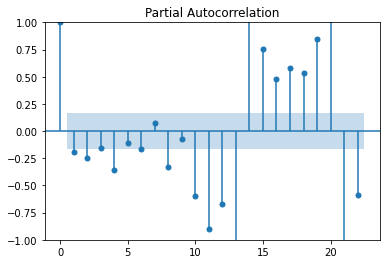

In [28]:
result = plot_pacf(df_airline['Passengers Second Difference'].dropna())

In [29]:
df_airline

,Thousands of Passengers,Passengers First Difference,Passengers Second Difference,Passengers 12 Difference
Month,,,,
1949-01-01,112.0,NaN,NaN,NaN
1949-02-01,118.0,6.0,NaN,NaN
1949-03-01,132.0,14.0,8.0,NaN
1949-04-01,129.0,-3.0,-17.0,NaN
1949-05-01,121.0,-8.0,-5.0,NaN
...,...,...,...,...
1960-08-01,606.0,-16.0,-103.0,47.0
1960-09-01,508.0,-98.0,-82.0,45.0
1960-10-01,461.0,-47.0,51.0,54.0


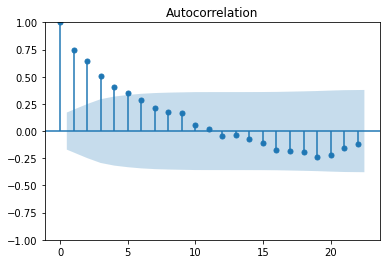

In [30]:
acf12 = plot_acf(df_airline['Passengers 12 Difference'].dropna())

c:\Python310\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


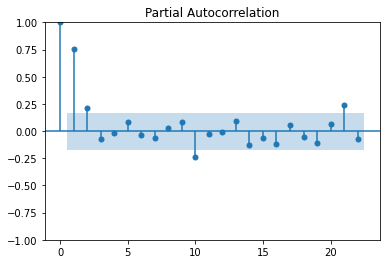

In [31]:
pacf12 = plot_pacf(df_airline['Passengers 12 Difference'].dropna())

In [32]:
from datetime import datetime, timedelta
train_dataset_end = datetime(1955,12,1)
test_dataset_end = datetime(1960,12,1)

In [33]:
train_data = df_airline[:train_dataset_end]
test_data = df_airline[train_dataset_end+timedelta(days=1):test_dataset_end]

In [34]:
train_data

,Thousands of Passengers,Passengers First Difference,Passengers Second Difference,Passengers 12 Difference
Month,,,,
1949-01-01,112.0,NaN,NaN,NaN
1949-02-01,118.0,6.0,NaN,NaN
1949-03-01,132.0,14.0,8.0,NaN
1949-04-01,129.0,-3.0,-17.0,NaN
1949-05-01,121.0,-8.0,-5.0,NaN
...,...,...,...,...
1955-08-01,347.0,-17.0,-66.0,54.0
1955-09-01,312.0,-35.0,-18.0,53.0
1955-10-01,274.0,-38.0,-3.0,45.0


In [35]:
test_data

,Thousands of Passengers,Passengers First Difference,Passengers Second Difference,Passengers 12 Difference
Month,,,,
1956-01-01,284.0,6.0,-35.0,42.0
1956-02-01,277.0,-7.0,-13.0,44.0
1956-03-01,317.0,40.0,47.0,50.0
1956-04-01,313.0,-4.0,-44.0,44.0
1956-05-01,318.0,5.0,9.0,48.0
1956-06-01,374.0,56.0,51.0,59.0
1956-07-01,413.0,39.0,-17.0,49.0
1956-08-01,405.0,-8.0,-47.0,58.0
1956-09-01,355.0,-50.0,-42.0,43.0


prediction

In [36]:
pred_start_date = test_data.index[0]
pred_end_date = test_data.index[-1]

## ARIMA: Auto-Regressive Integrated Moving Average

In [37]:
from statsmodels.tsa.arima.model import ARIMA

### ARIMA model creation

In [38]:
arima_model = ARIMA(train_data['Thousands of Passengers'], order=(10,2,0))

c:\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


### Model fitting

In [39]:
arima_model_fit = arima_model.fit()

### Fitted model summary

In [40]:
arima_model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                  SARIMAX Results                                  
===================================================================================
Dep. Variable:     Thousands of Passengers   No. Observations:                   84
Model:                     ARIMA(10, 2, 0)   Log Likelihood                -357.239
Date:                     Sun, 04 Dec 2022   AIC                            736.477
Time:                             22:51:14   BIC                            762.951
Sample:                         01-01-1949   HQIC                           747.106
                              - 12-01-1955                                         
Covariance Type:                       opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5166      0.121     -4.262      0.000      -0.754      -0.279
ar.L2         -0.7204      0.121     -5.940      0.000      -0.958      -0.483
ar.L3         -0.4857      0.125     -3.876      0.000      -0.731      -0.240
ar.L4         -0.7505      0.129     -5.819      0.000      -1.003      -0.498
ar.L5         -0.5062      0.169     -2.991      0.003      -0.838      -0.175
ar.L6         -0.5200      0.141     -3.683      0.000      -0.797      -0.243
ar.L7         -0.3051      0.143     -2.127      0.033      -0.586      -0.024
ar.L8         -0.5939      0.155     -3.833      0.000      -0.898      -0.290
ar.L9         -0.2963      0.132     -2.241      0.025      -0.555      -0.037
ar.L10        -0.4825      0.110     -4.376      0.000      -0.699      -0.266
sigma2       336.0939     66.064      5.087      0.000     206.612     465.576
===================================================================================
Ljung-Box (L1) (Q):                  10.86   Jarque-Bera (JB):                 1.24
Prob(Q):                              0.00   Prob(JB):                         0.54
Heteroskedasticity (H):               2.85   Skew:                             0.24
Prob(H) (two-sided):                  0.01   Kurtosis:                         2.64
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [41]:
print(pred_start_date)
print(pred_end_date)

1956-01-01 00:00:00
1960-12-01 00:00:00


### Data prediction & residuals determination

In [42]:
pred = arima_model_fit.predict(start=pred_start_date, end=pred_end_date)
residuals = test_data['Thousands of Passengers']-pred

### Residuals data

In [43]:
residuals.head()

Month
1956-01-01   -16.183612
1956-02-01   -32.478355
1956-03-01     0.556986
1956-04-01     5.172457
1956-05-01    -0.544232
dtype: float64

### Model Residuals plot

<AxesSubplot:ylabel='Density'>

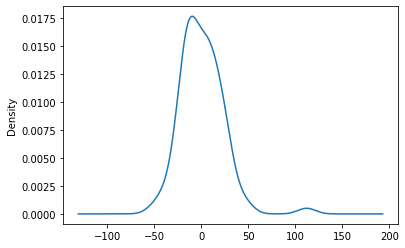

In [44]:
arima_model_fit.resid.plot(kind='kde')

### Predicted Data column

In [45]:
test_data['Predicted_ARIMA'] = pred

C:\Users\sinch\AppData\Local\Temp\ipykernel_4328\284031954.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['Predicted_ARIMA'] = pred


### Predicted data plotting

<AxesSubplot:xlabel='Month'>

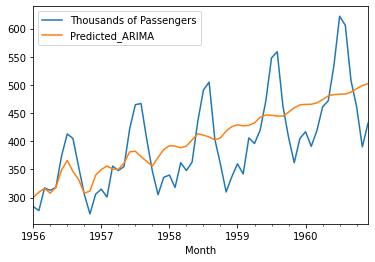

In [46]:
test_data[['Thousands of Passengers', 'Predicted_ARIMA']].plot()

## SARIMAX: Seasonal Auto-Regressive Integrated Moving Average with eXogenous factors

In [47]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

### SARIMAX model creation

In [48]:
sarimax_model = SARIMAX(train_data['Thousands of Passengers'], order=(3,0,5), seasonal_order=(1,1,1,12))

c:\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


### Model fitting

In [49]:
sarimax_model_fit = sarimax_model.fit()

c:\Python310\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


### Fitted model summary

In [50]:
sarimax_model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:              Thousands of Passengers   No. Observations:                   84
Model:             SARIMAX(3, 0, 5)x(1, 1, [1], 12)   Log Likelihood                -263.918
Date:                              Sun, 04 Dec 2022   AIC                            549.836
Time:                                      22:51:18   BIC                            574.880
Sample:                                  01-01-1949   HQIC                           559.806
                                       - 12-01-1955                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5538      3.049      0.182      0.856      -5.423       6.531
ar.L2          0.8499      0.367      2.318      0.020       0.131       1.569
ar.L3         -0.4149      2.780     -0.149      0.881      -5.864       5.034
ma.L1          0.2050      2.968      0.069      0.945      -5.612       6.022
ma.L2         -0.5099      2.190     -0.233      0.816      -4.803       3.783
ma.L3         -0.0915      0.641     -0.143      0.887      -1.348       1.165
ma.L4         -0.1884      0.479     -0.394      0.694      -1.127       0.750
ma.L5          0.1678      0.826      0.203      0.839      -1.452       1.788
ar.S.L12      -0.3098      0.868     -0.357      0.721      -2.010       1.391
ma.S.L12       0.1030      0.953      0.108      0.914      -1.765       1.971
sigma2        83.8477     28.418      2.950      0.003      28.149     139.547
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):                 1.94
Prob(Q):                              0.93   Prob(JB):                         0.38
Heteroskedasticity (H):               2.41   Skew:                             0.40
Prob(H) (two-sided):                  0.04   Kurtosis:                         2.94
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

### Head of whole dataframe

In [51]:
test_data.head()

,Thousands of Passengers,Passengers First Difference,Passengers Second Difference,Passengers 12 Difference,Predicted_ARIMA
Month,,,,,
1956-01-01,284.0,6.0,-35.0,42.0,300.183612
1956-02-01,277.0,-7.0,-13.0,44.0,309.478355
1956-03-01,317.0,40.0,47.0,50.0,316.443014
1956-04-01,313.0,-4.0,-44.0,44.0,307.827543
1956-05-01,318.0,5.0,9.0,48.0,318.544232


### Data prediction & residuals determination

In [52]:
pred_sarimax = sarimax_model_fit.predict(start=datetime(1956,6,6), end=datetime(1960,12,1))
residuals_sarimax = test_data['Thousands of Passengers']-pred_sarimax

### Residuals data

In [53]:
residuals_sarimax.tail()

1960-08-01    110.715129
1960-09-01     49.401753
1960-10-01     40.759814
1960-11-01      6.716849
1960-12-01     11.570306
dtype: float64

### Model Residuals plot

<AxesSubplot:ylabel='Density'>

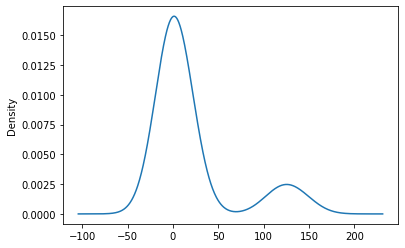

In [54]:
sarimax_model_fit.resid.plot(kind='kde')

### Predicted Data column

In [55]:
test_data['Predicted_SARIMAX'] = pred_sarimax

C:\Users\sinch\AppData\Local\Temp\ipykernel_4328\2646301213.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['Predicted_SARIMAX'] = pred_sarimax


### Tail-end of whole dataframe

In [56]:
test_data.tail()

,Thousands of Passengers,Passengers First Difference,Passengers Second Difference,Passengers 12 Difference,Predicted_ARIMA,Predicted_SARIMAX
Month,,,,,,
1960-08-01,606.0,-16.0,-103.0,47.0,483.883979,495.284871
1960-09-01,508.0,-98.0,-82.0,45.0,487.184102,458.598247
1960-10-01,461.0,-47.0,51.0,54.0,493.432782,420.240186
1960-11-01,390.0,-71.0,-24.0,28.0,498.930072,383.283151
1960-12-01,432.0,42.0,113.0,27.0,502.159824,420.429694


### Predicted data plotting

<AxesSubplot:xlabel='Month'>

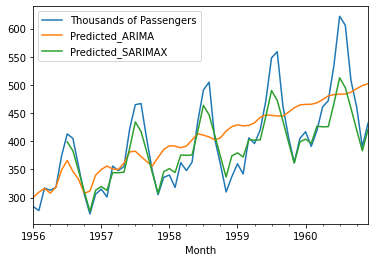

In [57]:
test_data[['Thousands of Passengers', 'Predicted_ARIMA', 'Predicted_SARIMAX']].plot()